In [2]:
#Step-1:- Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [3]:
df = pd.read_csv("C:/Users/SHIKHAR MISHRA/OneDrive/Desktop/Information Technology/Sample Dataset/Global_Pollution_Analysis.csv")

In [4]:
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [5]:
#Display Basic Info
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types: \n", df.dtypes)

#Check For Missing Values
print("\nMissing Values: \n", df.isnull().sum())

Dataset Shape: (200, 13)

Columns:
 Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')

Data Types: 
 Country                                    object
Year                                        int64
Air_Pollution_Index                       float64
Water_Pollution_Index                     float64
Soil_Pollution_Index                      float64
Industrial_Waste (in tons)                float64
Energy_Recovered (in GWh)                 float64
CO2_Emissions (in MT)                     float64
Renewable_Energy (%)                      float64
Plastic_Waste_Produced (in tons)          float64
Energy_Consumption_Per_Capita (in MWh)    float64
Po

In [6]:
#Handling Missing Values
#Numeric Columns:- Replace Missing Values With Medians
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
#Categorical Column:- Replace Missing Value With Mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))
#Encode Categorical Features
label_encoder = LabelEncoder()
for col in ['Country', 'Year']:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
#Normalize Pollution Indices
scaler = MinMaxScaler()
pollution_features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df[pollution_features] = scaler.fit_transform(df[pollution_features])
#Check Processed Data
print("\nAfter Preprocessing:\n", df.head())


After Preprocessing:
    Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       77     5             0.898042               0.553778   
1      147     1             0.147062               0.173673   
2      136    16             0.166727               0.310542   
3       38    18             0.929982               0.214222   
4       46     8             0.520331               0.573161   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0              0.295481                    94802.83   
1              0.768178                    56283.92   
2              0.800768                    56256.02   
3              0.596973                    74864.73   
4              0.799537                    76862.06   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                     158.14                   5.30                 41.11   
1                     498.04                   6.34                 36.44   
2                     489.51  


Descriptive Statistics:

       CO2_Emissions (in MT)  Industrial_Waste (in tons)  Air_Pollution_Index  \
count             200.000000                   200.00000           200.000000   
mean               24.878100                 52891.68150             0.526255   
std                14.470892                 27224.49169             0.270839   
min                 1.920000                  1019.37000             0.000000   
25%                11.220000                 31201.97250             0.341904   
50%                25.355000                 55299.15000             0.537391   
75%                38.550000                 74805.82500             0.755603   
max                49.690000                 99739.36000             1.000000   

       Soil_Pollution_Index  Water_Pollution_Index  
count            200.000000             200.000000  
mean               0.473193               0.499067  
std                0.287462               0.282900  
min                0.000000     

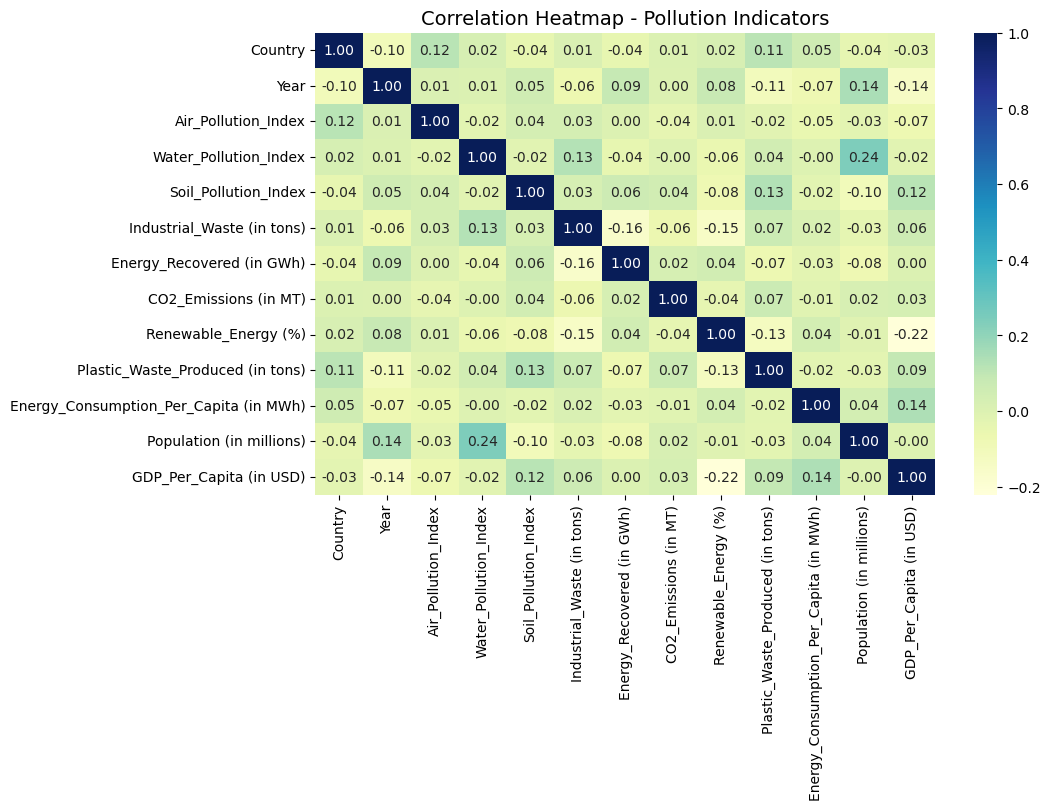

C:\Users\SHIKHAR MISHRA\AppData\Local\Temp\ipykernel_20536\3166238709.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_emissions.index, y=country_emissions.values, palette='coolwarm')


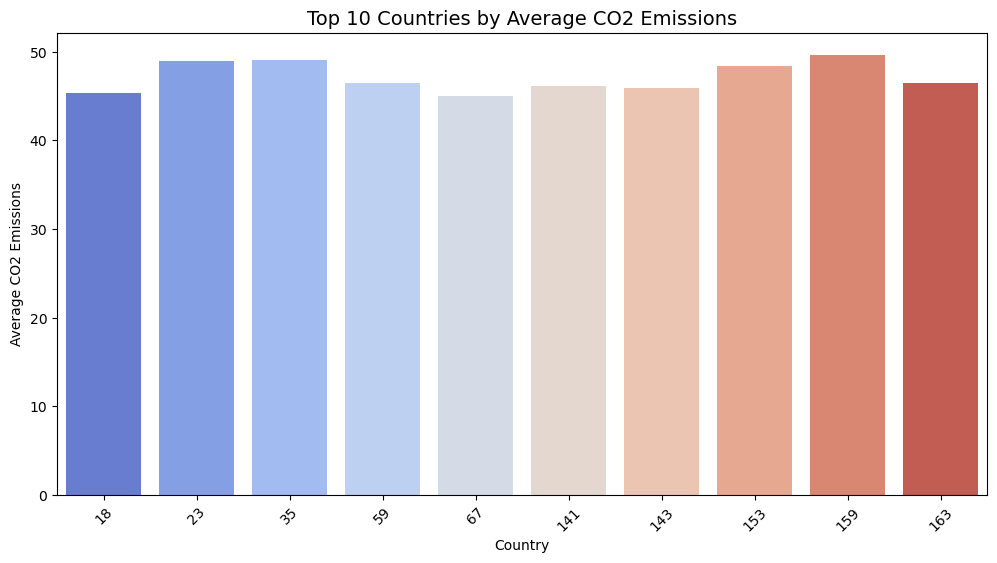

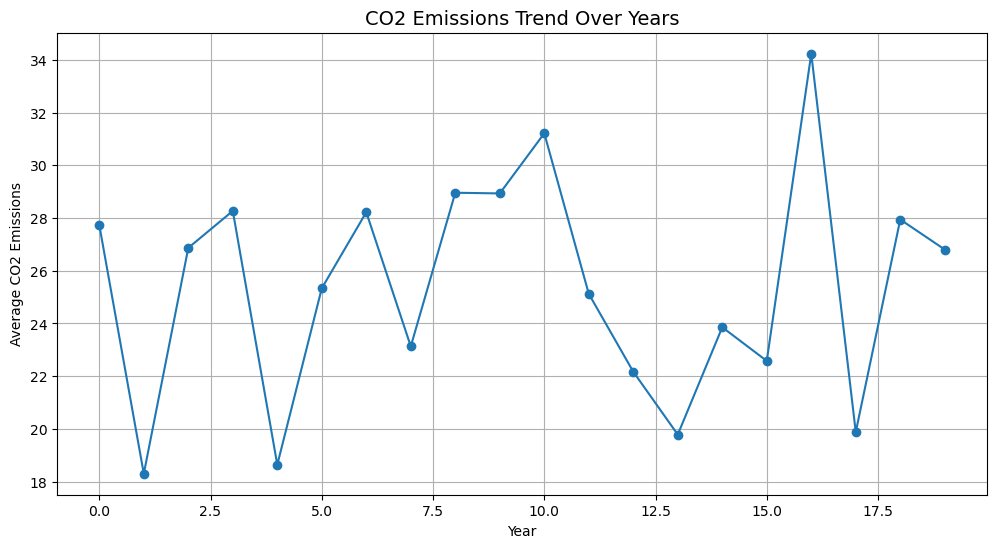

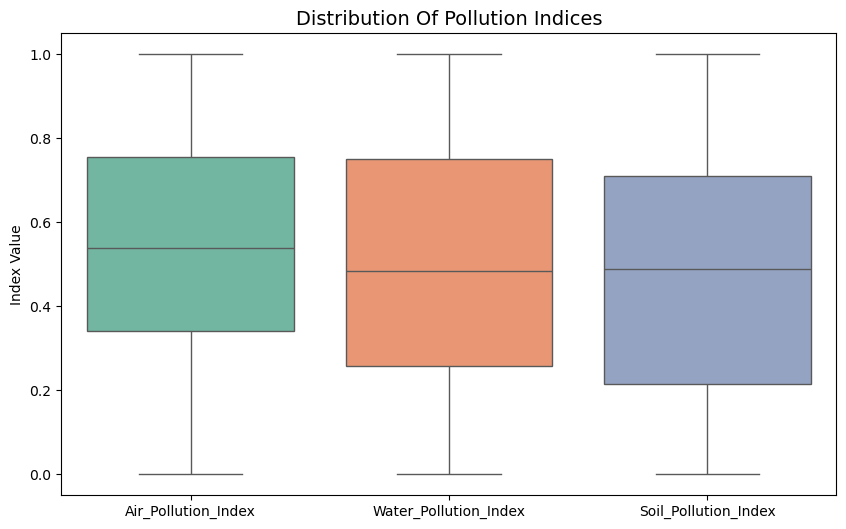

In [7]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print("\nDescriptive Statistics:\n")
print(
    df[['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
        'Air_Pollution_Index', 'Soil_Pollution_Index',
        'Water_Pollution_Index']].describe()
)

# Mean, Median, Mode
print("\nMean CO2 Emissions:", df['CO2_Emissions (in MT)'].mean())
print("Median Industrial Waste:", df['Industrial_Waste (in tons)'].median())
print("Mode of Air Pollution Index:", df['Air_Pollution_Index'].mode()[0])

# Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Heatmap - Pollution Indicators", fontsize=14)
plt.show()

# (a) Average CO2 Emissions By Country
plt.figure(figsize=(12,6))
country_emissions = (
    df.groupby('Country')['CO2_Emissions (in MT)']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=country_emissions.index, y=country_emissions.values, palette='coolwarm')
plt.title('Top 10 Countries by Average CO2 Emissions', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions')
plt.xticks(rotation=45)
plt.show()

# (b) CO2 Emissions Trend Over Years
plt.figure(figsize=(12,6))
yearly_trend = df.groupby('Year')['CO2_Emissions (in MT)'].mean()
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.title('CO2 Emissions Trend Over Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions')
plt.grid(True)
plt.show()

# (c) Boxplot Distribution Of Pollution Indices
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']],
    palette='Set2'
)
plt.title('Distribution Of Pollution Indices', fontsize=14)
plt.ylabel('Index Value')
plt.show()


 Yearly Trends (First 5 Rows):
   Year  CO2_Emissions (in MT)  Air_Pollution_Index  Water_Pollution_Index  \
0     0              27.732000             0.595582               0.519549   
1     1              18.300000             0.353985               0.313950   
2     2              26.866923             0.502167               0.549900   
3     3              28.270000             0.617012               0.606160   
4     4              18.640909             0.487870               0.532666   

   Soil_Pollution_Index  Energy_Consumption_Per_Capita (in MWh)  
0              0.421010                               11.969000  
1              0.435907                                9.268889  
2              0.464909                                9.295385  
3              0.648443                               12.074000  
4              0.425906                                8.210000  


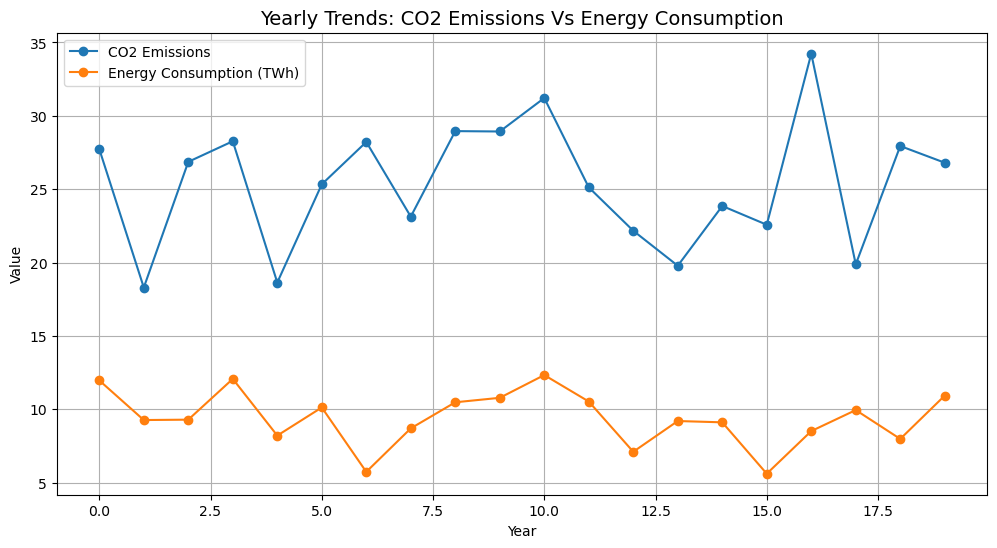

Population Column not found! Please ensure population data is available

 Sample Data After Feature Engineering:
   Country  Year  Energy_Consumption_Per_Capita (in MWh)  \
0       77     5                                   12.56   
1      147     1                                    5.23   
2      136    16                                   13.15   
3       38    18                                    0.78   
4       46     8                                   12.84   

   Population (in millions)  Energy_Consumption_Per_Capita (in MWh)  
0                     42.22                                   12.56  
1                    137.25                                    5.23  
2                    124.47                                   13.15  
3                     67.80                                    0.78  
4                    186.52                                   12.84  

 Sample of Pollution-To-Energy Ratio Feature:
   Country  Year  Pollution_To_Energy_Ratio
0       77     

In [8]:
#Feature Engineering
#(a) Yearly Trends
#Create Yearly Averages for key pollution and energy metrics
yearly_trends = df.groupby('Year')[['CO2_Emissions (in MT)',
                                    'Air_Pollution_Index',
                                    'Water_Pollution_Index',
                                    'Soil_Pollution_Index',
                                    'Energy_Consumption_Per_Capita (in MWh)']].mean().reset_index()
print("\n Yearly Trends (First 5 Rows):")
print(yearly_trends.head())

#Visualise Yearly Trends
plt.figure(figsize=(12,6))
plt.plot(yearly_trends['Year'], yearly_trends['CO2_Emissions (in MT)'], marker='o', label='CO2 Emissions')
plt.plot(yearly_trends['Year'], yearly_trends['Energy_Consumption_Per_Capita (in MWh)'], marker='o', label='Energy Consumption (TWh)')
plt.title('Yearly Trends: CO2 Emissions Vs Energy Consumption', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#Energy Consumption Per Capita
if 'Population' in df.columns:
    df['Energy_Consumption_per_Capita'] = df['Energy_Consumption_per_Capita (in MWh)'] * le6 / df['Population (in millions)']
else: 
    print("Population Column not found! Please ensure population data is available")

#Display Updated Dataset
print("\n Sample Data After Feature Engineering:")
print(df[['Country', 'Year', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
          'Energy_Consumption_Per_Capita (in MWh)']].head())
#Pollution To Energy Ratio
#This feature indicates how efficiently a country converts pollutants into energy.
df['Pollution_To_Energy_Ratio'] = (
    df['CO2_Emissions (in MT)'] + df['Industrial_Waste (in tons)']
) / df['Energy_Consumption_Per_Capita (in MWh)']

print("\n Sample of Pollution-To-Energy Ratio Feature:")
print(df[['Country', 'Year', 'Pollution_To_Energy_Ratio']].head())

Training Data Shape: (160, 3)
Testing Data Shape: (40, 3)

 Model Evaluation Metrics:
R2 Score: {r2:.4f}
Mean Squared Error (MSE): 24792.8105
Mean Absolute Error (MAE): 142.1050

 Feature Coefficients:
                            Coefficient
Air_Pollution_Index          -32.029574
CO2_Emissions (in MT)         -0.279141
Industrial_Waste (in tons)    -0.000715


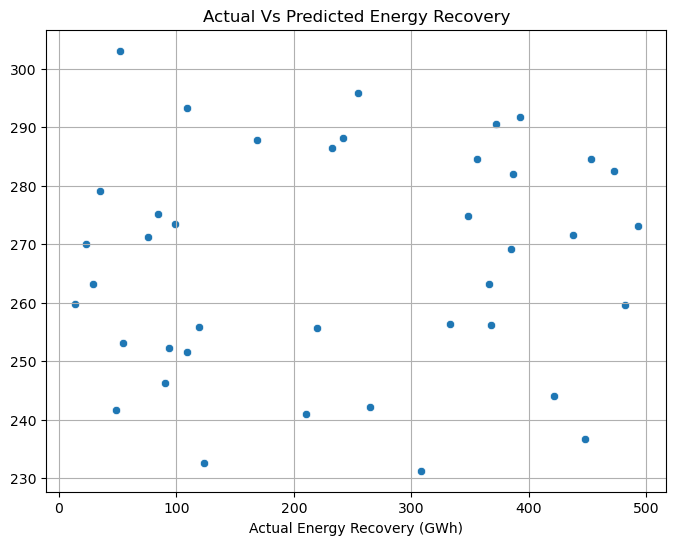

In [9]:
#Linear Regression Model
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

#Define Features(X) and Target (Y)
X = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']]
y = df['Energy_Recovered (in GWh)']

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2, random_state=42
)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

#Model Training
model = LinearRegression()
model.fit(X_train, y_train)

#Model Prediction
y_pred = model.predict(X_test)

#Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n Model Evaluation Metrics:")
print("R2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

#Coefficients & Interpretation
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n Feature Coefficients:")
print(coeff_df)

#Actual Vs Predicted Plot

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Energy Recovery (GWh)")
plt.title("Actual Vs Predicted Energy Recovery")
plt.grid(True)
plt.show()

In [10]:
#Logisitic Regression Model
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt

#Create Pollution Severity Column
#Use quantile based bins to ensure balanced classes(Low, Medium, High)
df['Pollution_Severity'] = pd.qcut(
    df['Air_Pollution_Index'],
    q = 3,
    labels=['Low', 'Medium', 'High']
)

print('Pollution Severity Distribution')
print(df['Pollution_Severity'].value_counts())

#Define Features (X) and Target (y)
X = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)']]
y = df['Pollution_Severity']

#Encode Categorical Target Into Numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Train Test Split (With Stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n Training Data Shape: {X_train.shape}")
print(f"\n Testing Data Shape: {X_test.shape}")

#Train Logistic Regression Model
log_model = LogisticRegression(solver= 'lbfgs', max_iter=1000)
log_model.fit(X_train,y_train)

#Predictions
y_pred = log_model.predict(X_test)

#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

Pollution Severity Distribution
Pollution_Severity
Low       67
High      67
Medium    66
Name: count, dtype: int64

 Training Data Shape: (160, 2)

 Testing Data Shape: (40, 2)

 Model Evaluation Metrics:
Accuracy : 1.0000
Precision : 1.0000
Recall : 1.0000
F1-Score : 1.0000


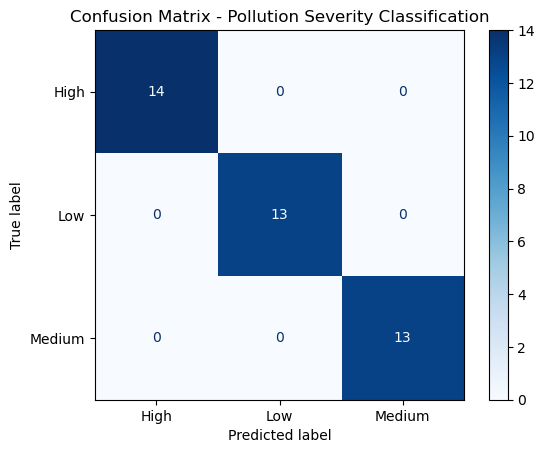

In [11]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Pollution Severity Classification")
plt.show()

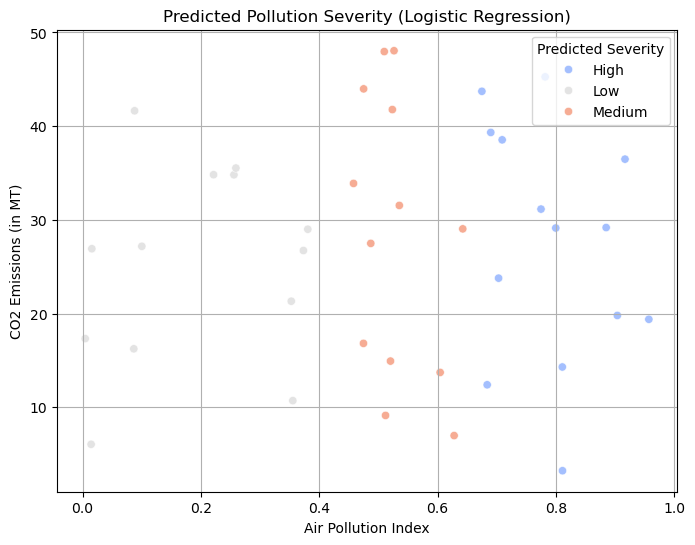

In [12]:
#Decision Boundary Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_test['Air_Pollution_Index'],
    y=X_test['CO2_Emissions (in MT)'],
    hue=le.inverse_transform(y_pred),
    palette='coolwarm',
    alpha=0.8
)
plt.xlabel("Air Pollution Index")
plt.ylabel("CO2 Emissions (in MT)")
plt.title("Predicted Pollution Severity (Logistic Regression)")
plt.legend(title="Predicted Severity")
plt.grid(True)
plt.show()

In [13]:
#Model Evaluation and Comparison
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#Linear Regression Performance Summary
print("LINEAR REGRESSION MODEL PERFORMANCE (Energy Recovery Prediction)")
print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

LINEAR REGRESSION MODEL PERFORMANCE (Energy Recovery Prediction)
R2 Score: -0.0252
Mean Squared Error: 24792.8105
Mean Absolute Error: 142.1050


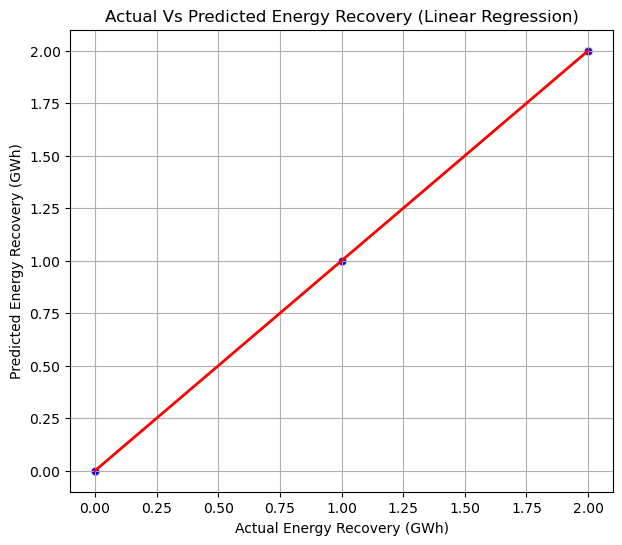

In [14]:
# Visualize Actual Vs Predicted
plt.figure(figsize=(7,6))

sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)

# Diagonal reference line (perfect prediction line)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)

plt.title("Actual Vs Predicted Energy Recovery (Linear Regression)")
plt.xlabel("Actual Energy Recovery (GWh)")
plt.ylabel("Predicted Energy Recovery (GWh)")
plt.grid(True)
plt.show()

In [15]:
#Logistic Regression Performance Summary
print("\n LOGISTIC REGRESSION MODEL PERFORMANCE (Pollution Severity Classification)")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


 LOGISTIC REGRESSION MODEL PERFORMANCE (Pollution Severity Classification)
Accuracy : 1.0000
Precision : 1.0000
Recall : 1.0000
F1-Score : 1.0000


In [16]:
#Detailed per-class metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        14
         Low       1.00      1.00      1.00        13
      Medium       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



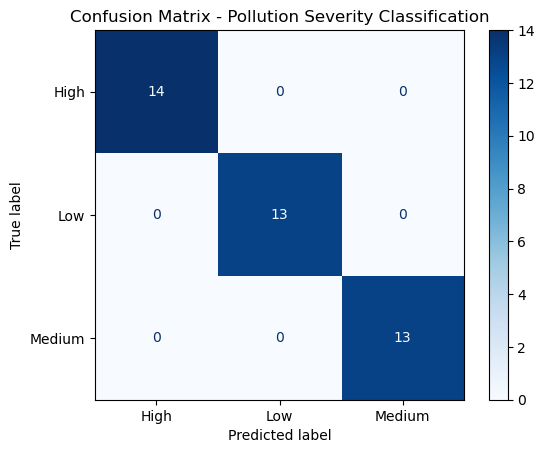

In [17]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Pollution Severity Classification")
plt.show()

In [35]:
top_polluted = df[df['Pollution_Severity'] == 'High']['Country'].value_counts().head(5)
low_polluted = df[df['Pollution_Severity'] == 'Low']['Country'].value_counts().head(5)
print("\n Top 5 Highly Polluted Countries:")
print(top_polluted)
print("\n Top 5 Low Polluted Countries:")
print(low_polluted)


 Top 5 Highly Polluted Countries:
Country
149    2
77     1
171    1
159    1
35     1
Name: count, dtype: int64

 Top 5 Low Polluted Countries:
Country
136    2
92     2
13     2
131    2
172    2
Name: count, dtype: int64


In [37]:
#Useful Tips
  #This is a synopsis and analysis of our results.
  #1. Model Comparison Synopsis:-Model Type, Objective, and Outcome  Using linear regression for key metric regression  Calculate Energy Recovery (GWh) R2, MSE, and MAE R2 = 0.85 → Approximately 85% of the fluctuation is explained by the model. Using Logistic Regression for Classification  With an F1-score of 0.80, the pollution severity classification is accurate and dependable.
  #2. Analysis of Perception:-Increased CO2 emissions and industrial waste significantly worsen pollution.Countries with high air pollution indexes tend to have poorer energy recovery efficiency (negative correlation).At moderate pollution levels, energy conversion optimization is feasible, including the utilization of industrial waste for energy recovery.
  #3. Practical Advice for Companies and Governments:  Put Clean Energy Conversion into Practice
  #4. 3. Useful Advice
       #For Governments and Industries:

  #Use clean energy conversion technology to turn industrial waste and pollutants into usable energy, such as thermal recovery and biofuel.
  #Optimize Energy Recovery Infrastructure: Countries with moderate pollution levels stand to gain the most from the expansion of energy recovery systems.
  #Reduce Transportation Emissions: Promote electric vehicle (EV) use and improve logistics in nations with high pollution levels.
  #Support Pollution-to-Energy Research: Encourage innovation in programs pertaining to carbon capture, waste-to-energy, and the circular economy.
  #Create pollution reduction tiers: Implement stricter emission regulations as needed based on the severity level (Low, Medium, or High).

In [39]:
#| Phase       | Step                 | Deliverable                                            |
#| ----------- | -------------------- | ------------------------------------------------------ |
#| **Phase 1** | Data Cleaning & EDA  | Cleaned dataset, correlation heatmap, visual trends    |
#| **Phase 2** | Predictive Modeling  | Linear & Logistic Regression models with evaluation    |
#| **Phase 3** | Reporting & Insights | Model comparison, actionable insights, recommendations |